### Region Proposal 구하기 실습

In [38]:
!pip install selectivesearch

In [39]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

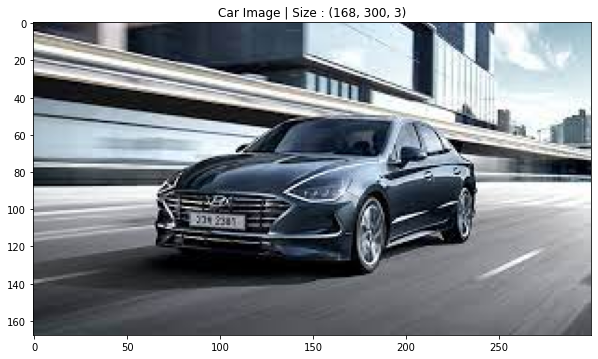

In [40]:
img = cv2.imread('/content/car.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #컬러변환 함수

fig = plt.figure(figsize=(10,10))
plt.title("Car Image | Size : {}".format(img_rgb.shape))
plt.imshow(img_rgb)
plt.show()

In [41]:
# 이미지의 Region Proposal정보 반환
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=1000)
print("Regions size : {}".format(len(regions)))

Regions size : 29


In [42]:
regions

[{'labels': [0.0], 'rect': (0, 0, 186, 48), 'size': 2219},
 {'labels': [1.0], 'rect': (49, 0, 160, 42), 'size': 2934},
 {'labels': [2.0], 'rect': (146, 0, 56, 35), 'size': 1557},
 {'labels': [3.0], 'rect': (136, 0, 163, 98), 'size': 9959},
 {'labels': [4.0], 'rect': (0, 17, 176, 33), 'size': 1480},
 {'labels': [5.0], 'rect': (0, 30, 144, 39), 'size': 2650},
 {'labels': [6.0], 'rect': (109, 50, 83, 30), 'size': 1679},
 {'labels': [7.0], 'rect': (0, 52, 121, 27), 'size': 2527},
 {'labels': [8.0], 'rect': (0, 71, 166, 43), 'size': 2840},
 {'labels': [9.0], 'rect': (174, 76, 63, 54), 'size': 2140},
 {'labels': [10.0], 'rect': (0, 87, 295, 80), 'size': 8735},
 {'labels': [11.0], 'rect': (230, 87, 69, 80), 'size': 3373},
 {'labels': [12.0], 'rect': (0, 89, 67, 27), 'size': 1729},
 {'labels': [13.0], 'rect': (0, 95, 179, 40), 'size': 4225},
 {'labels': [14.0], 'rect': (0, 123, 170, 36), 'size': 2353},
 {'labels': [0.0, 4.0], 'rect': (0, 0, 186, 50), 'size': 3699},
 {'labels': [6.0, 8.0], 'rec

In [43]:
regions[0]
# labels 값 / rect(디텍션)값 / rect의 크기 사이즈

{'labels': [0.0], 'rect': (0, 0, 186, 48), 'size': 2219}

In [44]:
rects = [region['rect'] for region in regions]
print(rects[:5])

[(0, 0, 186, 48), (49, 0, 160, 42), (146, 0, 56, 35), (136, 0, 163, 98), (0, 17, 176, 33)]


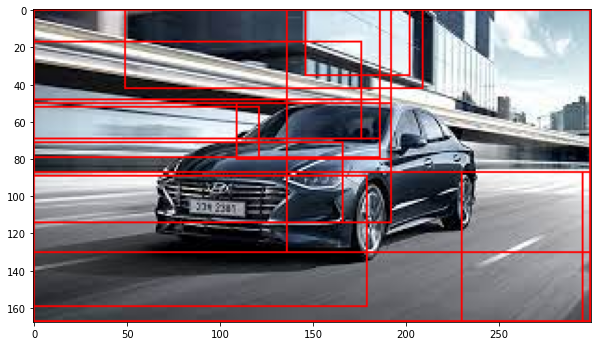

In [68]:
rect_color = (255,0,0)
img_rgb_copy = img_rgb.copy()

for rect in rects:
  x1,y1 = rect[0],rect[1]
  x2,y2 = x1+rect[2], y1+rect[3]

  img_rgb_copy = cv2.rectangle(img_rgb_copy, (x1,y1), (x2,y2), color=rect_color, thickness=1)


fig = plt.figure(figsize=(10,10))
plt.imshow(img_rgb_copy)
plt.show()

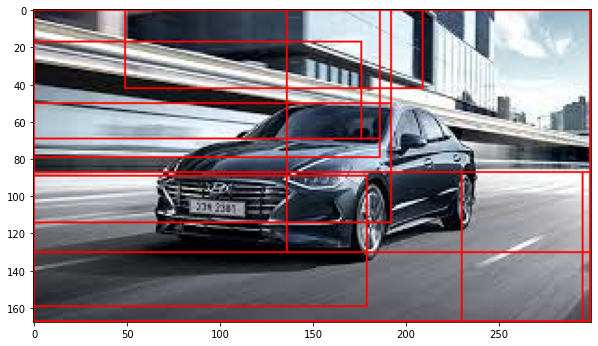

In [80]:
rects = [region['rect'] for region in regions if region['size']>3000]

rect_color = (255,0,0)
img_rgb_copy = img_rgb.copy()

for rect in rects:
  x1,y1 = rect[0],rect[1]
  x2,y2 = x1+rect[2], y1+rect[3]

  img_rgb_copy = cv2.rectangle(img_rgb_copy, (x1,y1), (x2,y2), color=rect_color, thickness=1)


fig = plt.figure(figsize=(10,10))
plt.imshow(img_rgb_copy)
plt.show()

### IOU 구하기 실습

In [73]:
def get_iou(label_box, pred_box):

  x1 = np.maximum(label_box[0], pred_box[0])
  y1 = np.maximum(label_box[1], pred_box[1])
  x2 = np.minimum(label_box[2], pred_box[2])
  y2 = np.minimum(label_box[3], pred_box[3])

  intersection = np.max(x2-x1, 0) * np.min(y2-y1, 0)

  label_box_area = (label_box[2]-label_box[0]) * (label_box[3]-label_box[1])
  pred_box_area = (pred_box[2]-pred_box[0]) * (pred_box[3]-pred_box[1])

  union = label_box_area + pred_box_area - intersection

  iou = intersection / union
  return iou

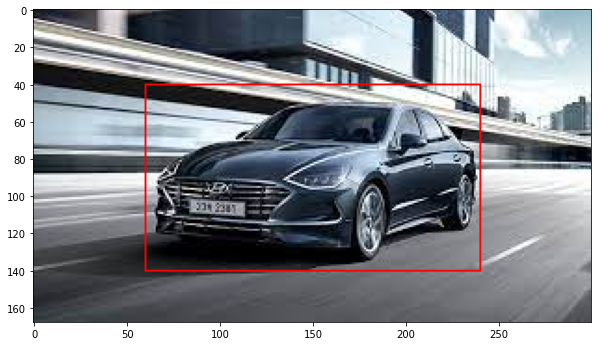

In [74]:
rect_color = (255,0,0)
img_rgb_copy = img_rgb.copy()

# 임의로 설정 된 정답 레이블 박스
label_box = [60, 40, 240, 140]

img_rgb_copy = cv2.rectangle(img_rgb_copy, (label_box[0],label_box[1]), (label_box[2],label_box[3]), color=rect_color, thickness=1)


fig = plt.figure(figsize=(10,10))
plt.imshow(img_rgb_copy)
plt.show()

In [82]:
# 이미지의 Region Proposal정보 반환
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)
print("Regions size : {}".format(len(regions)))

Regions size : 11


In [83]:
rects = [region['rect'] for region in regions]
print(rects[:5])

[(0, 0, 299, 130), (49, 0, 160, 42), (0, 17, 192, 97), (0, 87, 295, 80), (230, 87, 69, 80)]


In [84]:
for idx, pred_box in enumerate(rects):
  pred_box = list(pred_box)

  pred_box[2] += pred_box[0]
  pred_box[3] += pred_box[1]

  iou = get_iou(label_box, pred_box)
  print("index : {} | iou : {:.5f}".format(idx, iou))

index : 0 | iou : 0.39833
index : 1 | iou : 0.01220
index : 2 | iou : 0.36372
index : 3 | iou : 0.29757
index : 4 | iou : 0.02305
index : 5 | iou : 0.24811
index : 6 | iou : 0.41168
index : 7 | iou : 0.41012
index : 8 | iou : 0.37862
index : 9 | iou : 0.36048
index : 10 | iou : 0.36048


index : 6 | iou : 0.41168
index : 7 | iou : 0.41012


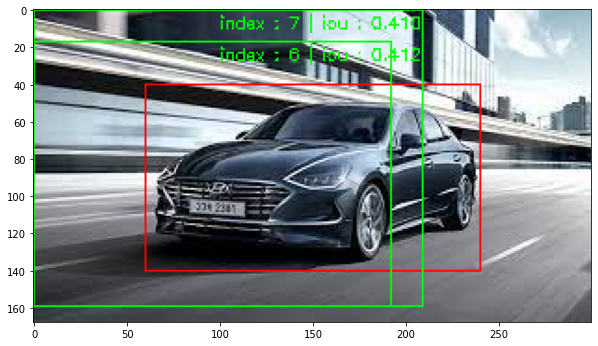

In [95]:
red_color = (255,0,0)
green_color = (0,255,0)
img_rgb_copy = img_rgb.copy()

# 임의로 설정 된 정답 레이블 박스
label_box = [60, 40, 240, 140]

img_rgb_copy = cv2.rectangle(img_rgb_copy, (label_box[0],label_box[1]), (label_box[2],label_box[3]), color=red_color, thickness=1)

for idx, pred_box in enumerate(rects):
  pred_box = list(pred_box)

  pred_box[2] += pred_box[0]
  pred_box[3] += pred_box[1]

  iou = get_iou(label_box, pred_box)

  if iou >= 0.4:
    print("index : {} | iou : {:.5f}".format(idx, iou))
    cv2.rectangle(img_rgb_copy, (pred_box[0],pred_box[1]), (pred_box[2],pred_box[3]), color=green_color, thickness=1)
    text = 'index : {} | iou : {:.3f}'.format(idx, iou)
    cv2.putText(img_rgb_copy, text, (pred_box[0]+ 100, pred_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, color=green_color, thickness=1)

fig = plt.figure(figsize=(10,10))
plt.imshow(img_rgb_copy)
plt.show()